In [2]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.utils import to_categorical, plot_model
from keras.models import Sequential
from keras.layers import Dense, Softmax, Activation
from keras.optimizers import Adam

(60000, 28, 28) (60000,)


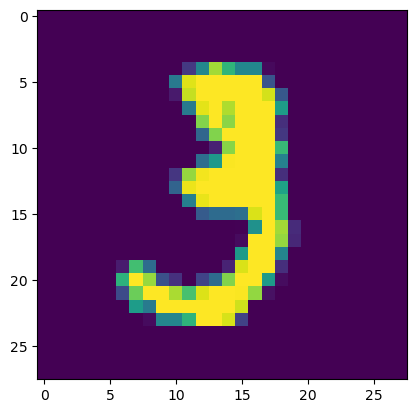

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
image_size = x_train.shape[1]
print(x_train.shape, y_train.shape)
image_0 = x_train[10]
plt.imshow(image_0)
plt.show()

In [4]:
# hyper paramters
n_outputs = 10 # len(np.unique(y_train))
n_inputs = image_size * image_size
hidden_layers = [256, 256]
activation_function = 'relu'

In [5]:
x_train = x_train.reshape((60000, image_size * image_size))
x_test = x_test.reshape((-1, image_size * image_size))

x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print(x_train.shape, y_train.shape)
print(y_train[:5])

(60000, 784) (60000, 10)
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


In [7]:
model = Sequential()
model.add(Dense(units=hidden_layers[0], input_dim=n_inputs, name='hidden_1'))
model.add(Activation(activation=activation_function, name='relu_1'))
model.add(Dense(units=hidden_layers[1], name='hidden_2'))
model.add(Activation(activation=activation_function, name='relu_2'))
model.add(Dense(units=n_outputs, name='output_layer'))
model.add(Activation(activation='softmax', name='soft_max'))
model.summary()


model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.01), metrics=['acc'])
model_histoty = model.fit(x_train, y_train, epochs=20, batch_size=32)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden_1 (Dense)            (None, 256)               200960    
                                                                 
 relu_1 (Activation)         (None, 256)               0         


                                                                 
 hidden_2 (Dense)            (None, 256)               65792     
                                                                 
 relu_2 (Activation)         (None, 256)               0         
                                                                 
 output_layer (Dense)        (None, 10)                2570      
                                                                 
 soft_max (Activation)       (None, 10)                0         
                                                                 
Total params: 269322 (1.03 MB)
Trainable params: 269322 (1.03 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 1/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2007 - acc: 0.9402
Epoch 2/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0832 - acc: 0.9745
Epoch 3/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0584 - acc: 0.9811
Epoch 4/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0427 - acc: 0.9867
Epoch 5/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0332 - acc: 0.9894
Epoch 6/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0283 - acc: 0.9903
Epoch 7/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0238 - acc: 0.9923
Epoch 8/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0212 - acc: 0.9930
Epoch 9/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0191 - acc: 0.9941
Epoch 10/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0149 - acc: 0.9955
Epoch 11/20
1875/1875 [=====

In [9]:
model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.01), metrics=['acc'])

In [10]:
model_histoty = model.fit(x_train, y_train, epochs=1, batch_size=32)

1875/1875 [==============================] - 10s 5ms/step - loss: 0.2495 - acc: 0.9440
